# Homework 3

Gerald I. Nakata

**Github: https://github.com/ichi206/EE399/tree/main/HW3**

In [2]:
#Import Block
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.io import loadmat
from sklearn.datasets import fetch_openml

# from mp1_toolkits.mplot3d import Axes3D


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [3]:
mnist = fetch_openml('mnist_784')

c:\Users\ginak\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X = mnist.data / 255.0
print(X.T.shape)

(784, 70000)


In [5]:
# 1 Do an SVD of MNIST data
U, sig, Vt = np.linalg.svd(X.T, full_matrices=False)

In [6]:
print(U.shape)
print(sig.shape)
print(Vt.shape)
Xbar = np.sum(np.mean(X, axis=0)) / 784.0 
#Xbar = 1/(len(X) * len(X[0]) * np.sum(X[:,:]))
Xnorm = X - Xbar
print(np.shape(np.mean(X, axis=0)))
#print(sig)

(784, 784)
(784,)
(784, 70000)
(784,)


(784,)


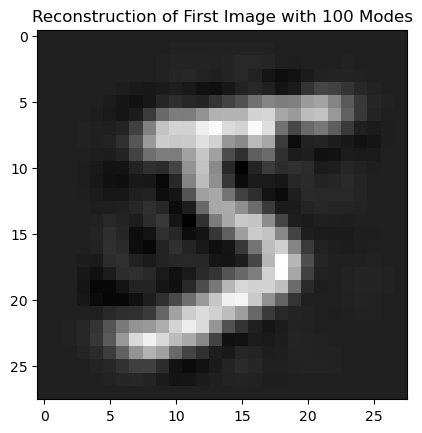

In [8]:
k = 100
Uk = U[:, :k]
sk = sig[:k]
Vtk = Vt[:k, :]

imgRec = np.dot(Uk, np.dot(np.diag(sk), Vtk))
imgRecon = imgRec.T.reshape(-1,28,28)
print(np.shape(imgRec[:,0]))
#print(np.shape(Xnorm[0]))

#fig, ax = plt.subplots(1, 2, figsize=(20, 15))
#ax[0].imshow(Xnorm[0,:].reshape(28,28), cmap='gray')
plt.title('Reconstruction of First Image with 100 Modes')
plt.imshow(imgRecon[0], cmap='gray')


2 What does the singular values spectrum look like and how many modes are necessary for good image reconstruction?

The singular value spectrum currently is (784,), but should be a diagonal matrix of the square roots of the eigenvalues of the input matrix. Around 100 modes are needed for a comprehensible image reconstruction. Fewer could be used, but it would make the image blurrier and harder to comprehend.

3 What are the interpretations of the U, sigma, and V matrices?

The U matrix is composed of eigenvectors for the row space of the input vector, so they represent the relationships that correlate the rows pixel data of the images together. From a matrix algebra perspective, this matrix transforms the image data so that the eigenvectors map onto the axes (parameters). 

The sigma matrix is the diagonal matric with the square roots of the eigenvalues of the input matrix. This weights the relationships that the more heavily correlated are more represented. This matrix performs a scaling operation.

The V matrix contains the column eigenvectors of the input matrix and represents the correlation of each of the columns pixel data to the overall pattern. In a transformation context, this matrix transforms back from eigenspace to the standard domain.

(70000, 784)
(70000, 3)


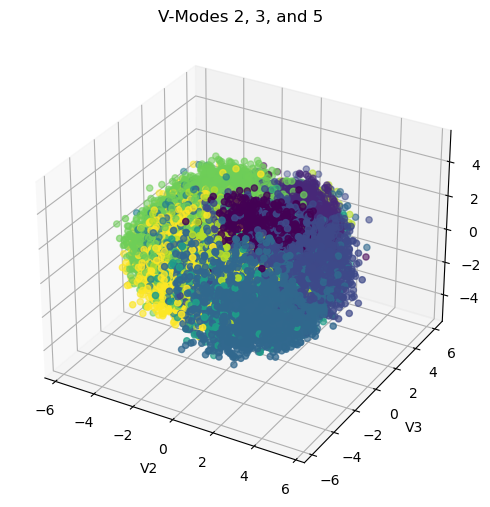

In [9]:
# 4

y = mnist.target

# Perform SVD on the data
U2, s2, Vt2 = np.linalg.svd(X, full_matrices=False)
select = [2,3,5]
X_svd = np.dot(U2[:, select], np.diag(s2[select]))

print(np.shape(U2))
print(np.shape(X_svd))

# Create the 3D scatter plot
fig, ax = plt.subplots(figsize=(20, 6), subplot_kw=dict(projection='3d'))
ax.scatter(X_svd[:, 0], X_svd[:, 1], X_svd[:, 2], c=y.astype(int), s=20)

# Set the labels and limits of the plot
ax.set_xlabel('V2')
ax.set_ylabel('V3')
ax.set_zlabel('V5')
ax.set_title('V-Modes 2, 3, and 5')

#plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

plt.show()

In [12]:
# Three digit classifier
# extract the features and labels
X = mnist.data
Y = mnist.target.astype(np.int)

# filter the data to include only the images of the first 3 digits
X3 = X[np.logical_or(Y == 0, np.logical_or(Y == 1, Y == 2))]
Y3 = y[np.logical_or(Y == 0, np.logical_or(Y == 1, Y == 2))]

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.2, train_size=0.8, random_state=42)

# create the classifier
clf = LogisticRegression(random_state=0, max_iter=1000, multi_class='multinomial')
# fit the classifier to the training data
clf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = clf.predict(X_test)

# calculate the accuracy, precision, recall, and F1-score of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:\n', report)

C:\Users\ginak\AppData\Local\Temp\ipykernel_35176\3065699672.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y = mnist.target.astype(np.int)


Accuracy: 0.9790996784565916
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1386
           1       0.98      0.99      0.98      1592
           2       0.97      0.96      0.97      1376

    accuracy                           0.98      4354
   macro avg       0.98      0.98      0.98      4354
weighted avg       0.98      0.98      0.98      4354



c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:

# Load the MNIST dataset
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)
# Convert target variable to integer type
Y = Y.astype(int)

c:\Users\ginak\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [14]:

def two_digit_classifier(digit_one, digit_two):

    # Verify that there are more than one class in the data
    #if len(np.unique(Y)) < 2:
    #    print('Error: Data contains only one class')
    #    return

    # Select data for the two digits
    X2 = X[(Y == digit_one) | (Y == digit_two)]
    Y2 = Y[(Y == digit_one) | (Y == digit_two)]

    # Verify that the data contains examples from more than one class
    if len(np.unique(Y2)) < 2:
        print('Error: Selected data contains only one class')
        return

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

    # Train a logistic regression classifier
    clf = LogisticRegression(random_state=0, max_iter=1000)
    clf.fit(X_train, Y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(Y_test, y_pred)

    # Print the accuracy of the classifier
    print('Classifier accuracy between digit', digit_one, 'and', digit_two, ':', accuracy)
    return accuracy


In [15]:
for i in range(10):
    for j in range(i, 10):
        if (i != j):
            print("===========", i , "Compared to", j, "===========")
            two_digit_classifier(i, j)
        

=========== 0 Compared to 1 ===========
Classifier accuracy between digit 0 and 1 : 0.9993234100135318
=========== 0 Compared to 2 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 0 and 2 : 0.9866858582223822
=========== 0 Compared to 3 ===========
Classifier accuracy between digit 0 and 3 : 0.9911000355998576
=========== 0 Compared to 4 ===========
Classifier accuracy between digit 0 and 4 : 0.9941733430444283
=========== 0 Compared to 5 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 0 and 5 : 0.9788199697428139
=========== 0 Compared to 6 ===========
Classifier accuracy between digit 0 and 6 : 0.9865747460087083
=========== 0 Compared to 7 ===========
Classifier accuracy between digit 0 and 7 : 0.995774647887324
=========== 0 Compared to 8 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 0 and 8 : 0.9887108521485798
=========== 0 Compared to 9 ===========
Classifier accuracy between digit 0 and 9 : 0.9895420122610891
=========== 1 Compared to 2 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 1 and 2 : 0.9858776059179556
=========== 1 Compared to 3 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 1 and 3 : 0.9860186418109188
=========== 1 Compared to 4 ===========
Classifier accuracy between digit 1 and 4 : 0.9959197551853112
=========== 1 Compared to 5 ===========
Classifier accuracy between digit 1 and 5 : 0.9947145877378436
=========== 1 Compared to 6 ===========
Classifier accuracy between digit 1 and 6 : 0.9986445272788885
=========== 1 Compared to 7 ===========
Classifier accuracy between digit 1 and 7 : 0.9943968358602505
=========== 1 Compared to 8 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 1 and 8 : 0.9778986739204353
=========== 1 Compared to 9 ===========
Classifier accuracy between digit 1 and 9 : 0.9922480620155039
=========== 2 Compared to 3 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 2 and 3 : 0.9621506897771489
=========== 2 Compared to 4 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 2 and 4 : 0.9706840390879479
=========== 2 Compared to 5 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 2 and 5 : 0.9695603156708005
=========== 2 Compared to 6 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 2 and 6 : 0.9708002883922134
=========== 2 Compared to 7 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 2 and 7 : 0.9779488974448722
=========== 2 Compared to 8 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 2 and 8 : 0.9569308722403185
=========== 2 Compared to 9 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 2 and 9 : 0.9838709677419355
=========== 3 Compared to 4 ===========
Classifier accuracy between digit 3 and 4 : 0.9903329752953813
=========== 3 Compared to 5 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 3 and 5 : 0.9516908212560387
=========== 3 Compared to 6 ===========
Classifier accuracy between digit 3 and 6 : 0.996077032810271
=========== 3 Compared to 7 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 3 and 7 : 0.9799099411153447
=========== 3 Compared to 8 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 3 and 8 : 0.9574087329992842
=========== 3 Compared to 9 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 3 and 9 : 0.9712765957446808
=========== 4 Compared to 5 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 4 and 5 : 0.987062404870624
=========== 4 Compared to 6 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 4 and 6 : 0.9901459854014598
=========== 4 Compared to 7 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 4 and 7 : 0.9868980169971672
=========== 4 Compared to 8 ===========
Classifier accuracy between digit 4 and 8 : 0.9846153846153847
=========== 4 Compared to 9 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 4 and 9 : 0.9597388465723613
=========== 5 Compared to 6 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 5 and 6 : 0.9651250947687642
=========== 5 Compared to 7 ===========
Classifier accuracy between digit 5 and 7 : 0.9930198383541513
=========== 5 Compared to 8 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 5 and 8 : 0.9562404870624048
=========== 5 Compared to 9 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 5 and 9 : 0.9736346516007532
=========== 6 Compared to 7 ===========
Classifier accuracy between digit 6 and 7 : 0.9996471418489767
=========== 6 Compared to 8 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 6 and 8 : 0.9886902590295512
=========== 6 Compared to 9 ===========
Classifier accuracy between digit 6 and 9 : 0.9992771955186122
=========== 7 Compared to 8 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 7 and 8 : 0.988314447592068
=========== 7 Compared to 9 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 7 and 9 : 0.9551034724658015
=========== 8 Compared to 9 ===========
Classifier accuracy between digit 8 and 9 : 0.9691693870148712


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The two most different digits appears to be 6 and 7.
Classifier accuracy between digit 6 and 7 : 0.9996471418489767

The most similar or hardest to differentiate digits are 3 and 5.
Classifier accuracy between digit 3 and 5 : 0.9516908212560387

In [16]:
# SVM Linear Classifier

from sklearn.svm import SVC


def two_digit_classifier_svm(digit_one, digit_two):
    # Select data for the two digits
    X2 = X[(Y == digit_one) | (Y == digit_two)]
    Y2 = Y[(Y == digit_one) | (Y == digit_two)]

    # Verify that the data contains examples from more than one class
    if len(np.unique(Y2)) < 2:
        print('Error: Selected data contains only one class')
        return

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

    # Train an SVM classifier
    clf = SVC(kernel='linear', random_state=0)
    clf.fit(X_train, Y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(Y_test, y_pred)

    # Print the accuracy of the classifier
    print('SVM Classifier accuracy between digit', digit_one, 'and', digit_two, ':', accuracy)
    return accuracy

In [17]:
# Decision Tree Linear Classifier
from sklearn.tree import DecisionTreeClassifier

def two_digit_classifier_dt(digit_one, digit_two):

    # Select data for the two digits
    X2 = X[(Y == digit_one) | (Y == digit_two)]
    Y2 = Y[(Y == digit_one) | (Y == digit_two)]

    # Verify that the data contains examples from more than one class
    if len(np.unique(Y2)) < 2:
        print('Error: Selected data contains only one class')
        return

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

    # Train a decision tree classifier
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, Y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(Y_test, y_pred)

    # Print the accuracy of the classifier
    print('Decision Tree Classifier accuracy between digit', digit_one, 'and', digit_two, ':', accuracy)

    return accuracy


In [18]:
cla = 0.0
svm = 0.0
dt = 0.0
for i in range(10):
    for j in range(i, 10):
        if (i != j):
            print("===========", i , "Compared to", j, "===========")
            cla = cla + two_digit_classifier(i, j)
            svm = svm + two_digit_classifier_svm(i, j)
            dt = dt + two_digit_classifier_dt(i, j)
print("Classifier Net Acc Score: ", cla)
print("SVM Classifier Net Acc Score: ", svm)
print("DT Classifier Net Acc Score: ", dt)

=========== 0 Compared to 1 ===========
Classifier accuracy between digit 0 and 1 : 0.9993234100135318
SVM Classifier accuracy between digit 0 and 1 : 0.9996617050067659
Decision Tree Classifier accuracy between digit 0 and 1 : 0.9979702300405954
=========== 0 Compared to 2 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 0 and 2 : 0.9866858582223822
SVM Classifier accuracy between digit 0 and 2 : 0.9848866498740554
Decision Tree Classifier accuracy between digit 0 and 2 : 0.981288233177402
=========== 0 Compared to 3 ===========
Classifier accuracy between digit 0 and 3 : 0.9911000355998576
SVM Classifier accuracy between digit 0 and 3 : 0.9907440370238519
Decision Tree Classifier accuracy between digit 0 and 3 : 0.9871840512637949
=========== 0 Compared to 4 ===========
Classifier accuracy between digit 0 and 4 : 0.9941733430444283
SVM Classifier accuracy between digit 0 and 4 : 0.9927166788055353
Decision Tree Classifier accuracy between digit 0 and 4 : 0.9879825200291333
=========== 0 Compared to 5 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 0 and 5 : 0.9788199697428139
SVM Classifier accuracy between digit 0 and 5 : 0.9807110438729199
Decision Tree Classifier accuracy between digit 0 and 5 : 0.9844931921331316
=========== 0 Compared to 6 ===========
Classifier accuracy between digit 0 and 6 : 0.9865747460087083
SVM Classifier accuracy between digit 0 and 6 : 0.9869375907111756
Decision Tree Classifier accuracy between digit 0 and 6 : 0.9782293178519593
=========== 0 Compared to 7 ===========
Classifier accuracy between digit 0 and 7 : 0.995774647887324
SVM Classifier accuracy between digit 0 and 7 : 0.995774647887324
Decision Tree Classifier accuracy between digit 0 and 7 : 0.9894366197183099
=========== 0 Compared to 8 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 0 and 8 : 0.9887108521485798
SVM Classifier accuracy between digit 0 and 8 : 0.9879825200291333
Decision Tree Classifier accuracy between digit 0 and 8 : 0.9788783685360525
=========== 0 Compared to 9 ===========
Classifier accuracy between digit 0 and 9 : 0.9895420122610891
SVM Classifier accuracy between digit 0 and 9 : 0.9895420122610891
Decision Tree Classifier accuracy between digit 0 and 9 : 0.9841327082582041
=========== 1 Compared to 2 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 1 and 2 : 0.9858776059179556
SVM Classifier accuracy between digit 1 and 2 : 0.9838601210490922
Decision Tree Classifier accuracy between digit 1 and 2 : 0.9794889038332213
=========== 1 Compared to 3 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 1 and 3 : 0.9860186418109188
SVM Classifier accuracy between digit 1 and 3 : 0.9840213049267643
Decision Tree Classifier accuracy between digit 1 and 3 : 0.9836884154460719
=========== 1 Compared to 4 ===========
Classifier accuracy between digit 1 and 4 : 0.9959197551853112
SVM Classifier accuracy between digit 1 and 4 : 0.9942196531791907
Decision Tree Classifier accuracy between digit 1 and 4 : 0.9918395103706222
=========== 1 Compared to 5 ===========
Classifier accuracy between digit 1 and 5 : 0.9947145877378436
SVM Classifier accuracy between digit 1 and 5 : 0.9943622269203665
Decision Tree Classifier accuracy between digit 1 and 5 : 0.9880197322057788
=========== 1 Compared to 6 ===========
Classifier accuracy between digit 1 and 6 : 0.9986445272788885
SVM Classifier accuracy between digit 1 and 6 : 0.9986445272788885
Decision Tree Classifier accuracy between digit 1 and 6 : 0.9908505591324974
=========== 1 Compared to 7 ===========
Classifier a

c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 1 and 8 : 0.9778986739204353
SVM Classifier accuracy between digit 1 and 8 : 0.9785787147228834
Decision Tree Classifier accuracy between digit 1 and 8 : 0.9738184291057463
=========== 1 Compared to 9 ===========
Classifier accuracy between digit 1 and 9 : 0.9922480620155039
SVM Classifier accuracy between digit 1 and 9 : 0.9912369396697001
Decision Tree Classifier accuracy between digit 1 and 9 : 0.9861813279406808
=========== 2 Compared to 3 ===========


c:\Users\ginak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier accuracy between digit 2 and 3 : 0.9621506897771489
